In [10]:
import pandas as pd
import numpy as np

In [12]:
adf

,c1,c2,c3,c4
a,1,2,3,4
b,2,3,4,5
c,3,4,5,6


In [15]:
adf=pd.DataFrame([[1,2,3,4],[2,3,4,5],[3,4,5,6]],index=["a","b","c"],columns=["c1","c2","c3","c4"])
print(adf.sum(axis=0))
print(adf.sum(axis=1))

c1     6
c2     9
c3    12
c4    15
dtype: int64
a    10
b    14
c    18
dtype: int64


###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [2]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [55]:
df_swapped=df.swaplevel(axis=1).stack(future_stack=True).swaplevel(0).unstack().swaplevel(axis=1)
df_swapped.sort_index(level=0)

cse         ece      cse      ece
            avg_package avg_package students students
delhi  2019           1           9        2       10
       2020           3          11        4       12
       2021           5          13        6       14
       2022           7          15        8       16
mumbai 2019           0           0        0        0
       2020           0           0        0        0
       2021           0           0        0        0
       2022           0           0        0        0

###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [72]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [74]:
confirml=confirm.melt(id_vars=["Country/Region","Province/State","Long","Lat"],var_name="Date",value_name="num_cases")
deathsl=deaths.melt(id_vars=["Country/Region","Province/State","Long","Lat"],var_name="Date",value_name="num_deaths")
covid=deathsl.merge(confirml)
covid.set_index(["Country/Region","Province/State"])[["Date","num_deaths","num_cases"]]

,,Date,num_deaths,num_cases
Country/Region,Province/State,,,
Afghanistan,NaN,1/22/20,0,0
Albania,NaN,1/22/20,0,0
Algeria,NaN,1/22/20,0,0
Andorra,NaN,1/22/20,0,0
Angola,NaN,1/22/20,0,0
...,...,...,...,...
West Bank and Gaza,NaN,1/2/23,5708,703228
Winter Olympics 2022,NaN,1/2/23,0,535
Yemen,NaN,1/2/23,2159,11945


In [57]:
confirm

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,334021,334021,334066,334108,334196,334294,334425,334425,334629,334661


In [80]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4022,4022,4023,4023,4024,4024,4024,4024


###`Q-3:` Show Country with Heighest death percent out of confirmed Cases.

In [95]:
#using wide df
'''confirm_nums=confirm.drop(columns=["Province/State","Long","Lat"]).set_index("Country/Region").sum(axis=1).rename("num_cases")
death_nums=deaths.drop(columns=["Province/State","Long","Lat"]).set_index("Country/Region").sum(axis=1).rename("num_death")
stats=pd.concat([death_nums,confirm_nums],axis=1)
stats['death_percent']=(stats["num_death"].div(stats["num_cases"]))*100
stats.sort_values(by="death_percent",ascending=False)'''
#bad way for this data set since the values are cumulative

,num_death,num_cases,death_percent
Country/Region,,,
Canada,1017,32,3178.125000
"Korea, North",1404,234,600.000000
MS Zaandam,2014,9071,22.202624
Yemen,1372952,7091065,19.361718
Sudan,2850576,38729339,7.360250
...,...,...,...
Summer Olympics 2020,0,441598,0.000000
Canada,0,13275,0.000000
Tuvalu,0,137771,0.000000


In [77]:
#using long df
'''cov_g=covid.groupby("Country/Region").agg({"num_deaths":"sum","num_cases":"sum"})
cov_g["death_percent"]=(cov_g["num_deaths"].div(cov_g["num_cases"]))*100
cov_g.sort_values(by="death_percent",ascending=False)'''
#same as above

,num_deaths,num_cases,death_percent
Country/Region,,,
"Korea, North",1404,234,600.000000
MS Zaandam,2014,9071,22.202624
Yemen,1372952,7091065,19.361718
Sudan,2850576,38729339,7.360250
Peru,156296296,2203724423,7.092370
...,...,...,...
Antarctica,0,4235,0.000000
Holy See,0,24893,0.000000
Summer Olympics 2020,0,441598,0.000000


In [124]:
#using wide df
total_confirm=confirm.iloc[:,[1,-1]].groupby("Country/Region").sum().rename(columns={'1/2/23':"total_cases"})
total_deaths=deaths.iloc[:,[1,-1]].groupby("Country/Region").sum().rename(columns={'1/2/23':"total_deaths"})
stats=pd.concat([total_confirm,total_deaths],axis=1)
stats["death_percent"]=(stats['total_deaths'].div(stats['total_cases']))*100
stats.sort_values(by="death_percent",ascending=False).head(20)


,total_cases,total_deaths,death_percent
Country/Region,,,
"Korea, North",1,6,600.000000
MS Zaandam,9,2,22.222222
Yemen,11945,2159,18.074508
Sudan,63686,4994,7.841598
Syria,57423,3163,5.508246
Somalia,27300,1361,4.985348
Peru,4459771,218233,4.893368
Egypt,515645,24801,4.809704
Mexico,7234467,331099,4.576688


### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

In [130]:
india=covid[covid["Country/Region"]=="India"].copy()
india["num_new_cases"]=india["num_cases"].subtract(india["num_cases"].shift(1))
india["num_new_deaths"]=india["num_deaths"].subtract(india["num_deaths"].shift(1))
india.sort_values(by=["num_new_deaths","num_new_cases"],ascending=False)

,Country/Region,Province/State,Long,Lat,Date,num_deaths,num_cases,num_new_cases,num_new_deaths
146093,India,NaN,78.96288,20.593684,6/10/21,363079,29274823,92291.0,7374.0
139446,India,NaN,78.96288,20.593684,5/18/21,283248,25496330,267334.0,4529.0
140891,India,NaN,78.96288,20.593684,5/23/21,303720,26752447,222315.0,4454.0
139157,India,NaN,78.96288,20.593684,5/17/21,278719,25228996,263533.0,4329.0
140024,India,NaN,78.96288,20.593684,5/20/21,291331,26031991,259551.0,4209.0
...,...,...,...,...,...,...,...,...,...
295506,India,NaN,78.96288,20.593684,11/9/22,530509,44660293,0.0,0.0
304754,India,NaN,78.96288,20.593684,12/11/22,530658,44676045,0.0,0.0
294928,India,NaN,78.96288,20.593684,11/7/22,530509,44660293,-1211.0,0.0
17199,India,NaN,78.96288,20.593684,3/21/20,4,330,86.0,-1.0


### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [192]:
air_pol_s=air_pol.drop("Unnamed: 0",axis=1).melt(id_vars=["Country", "City/Town", "Year","Position","Temporal coverage.1","Temporal coverage"],value_vars=["PM10","PM2.5"],var_name="Pollutants").set_index(["Year","Country", "City/Town","Position","Temporal coverage.1","Temporal coverage",'Pollutants'])["value"]
air_pol_s

Year  Country      City/Town     Position  Temporal coverage.1  Temporal coverage  Pollutants
2016  India        Kanpur        1         NaN                  >75%               PM10          319
                   Faridabad     2         NaN                  >75%               PM10          316
                   Gaya          3         NaN                  50% -< 75%         PM10          275
                   Varanasi      4         NaN                  >75%               PM10          260
                   Patna         5         NaN                  >75%               PM10          266
                                                                                                ... 
      Poland       Lublin        496       >75%                 >75%               PM2.5          27
                   Siedlce       497       >75%                 >75%               PM2.5          27
                   Trzebinia     498       >75%                 >75%               PM2.5          27
      El Salvador  San Salvador  499       NaN                  50% -< 75%         PM2.5          27
      Turkey       Sivas         500       >75%                 >75%               PM2.5          27
Name: value, Length: 1000, dtype: int64

In [151]:
air_pol=pd.read_csv("https://tinyurl.com/2fe6vz4u")
air_pol

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018
...,...,...,...,...,...,...,...,...,...,...
495,495,496,Poland,Lublin,2016,27,>75%,31,>75%,2018
496,496,497,Poland,Siedlce,2016,27,>75%,29,>75%,2018
497,497,498,Poland,Trzebinia,2016,27,>75%,35,>75%,2018
498,498,499,El Salvador,San Salvador,2016,27,50% -< 75%,59,NaN,2018


In [137]:
#1
air_pol[air_pol["Country"]=="India"][["City/Town","PM10"]].sort_values(by="PM10",ascending=False).head(1)

,City/Town,PM10
0,Kanpur,319


In [138]:
#2
air_pol[air_pol["Country"]=="India"][["City/Town","PM10"]].sort_values(by="PM10",ascending=True).head(1)

,City/Town,PM10
483,Aizawl,44


In [139]:
#3
print(air_pol[air_pol["Country"]=="China"][["City/Town","PM10"]].sort_values(by="PM10",ascending=True).head(1))
print(air_pol[air_pol["Country"]=="China"][["City/Town","PM10"]].sort_values(by="PM10",ascending=False).head(1))

    City/Town  PM10
476    Anshun    38
   City/Town  PM10
21     Jinan   192


<Axes: ylabel='PM10'>

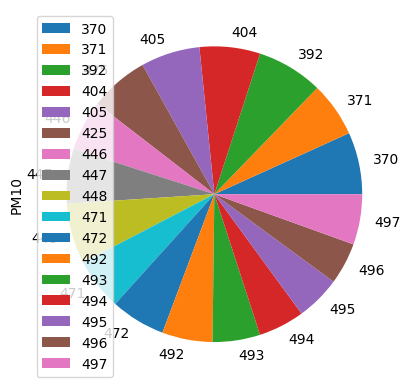

In [149]:
#4
poland=air_pol[air_pol["Country"]=="Poland"][["City/Town","PM10"]]
poland.plot(y="PM10",kind="pie")

<Axes: xlabel='Country'>

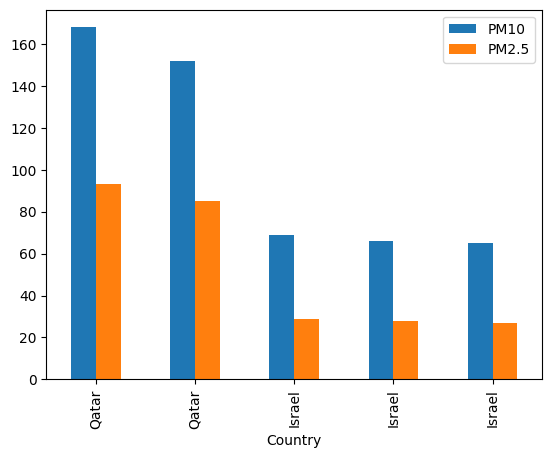

In [164]:
#5
is_qat=air_pol[(air_pol["Country"]=="Israel")|(air_pol["Country"]=="Qatar")][["Country","City/Town","PM10","PM2.5"]]
is_qat.plot(kind="bar",x="Country")